In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load Boston dataset
boston = fetch_openml(name="boston", version=1, as_frame=True)
display(boston.frame.head())
df = boston.frame[['LSTAT' ,  'MEDV']].copy()
df.columns = ['X', 'Y']

# Sort data by predictor (X = lstat)
df = df.sort_values(by='X').reset_index(drop=True)
display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


,X,Y
0,1.73,50.0
1,1.92,50.0
2,1.98,34.9
3,2.47,41.7
4,2.87,36.4


In [3]:
X = np.array(df['X'])
y = np.array(df['Y'])

In [4]:
X.shape, y.shape

((506,), (506,))

In [5]:
#model = np.poly1d(np.polyfit(X, y, 2))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

In [7]:
X_test

array([ 8.58, 12.27, 29.68,  5.29, 22.74,  5.49, 14.  ,  7.44, 24.91,
       34.02,  9.97,  2.98, 18.46,  5.5 , 14.19, 25.68,  6.9 , 17.27,
        9.43, 21.52, 12.13, 12.43,  3.92, 34.37, 18.85, 25.79,  5.5 ,
       22.98,  9.69, 30.81,  8.51, 14.1 , 16.65, 16.14, 24.1 ,  7.79,
        1.98, 14.69,  9.67,  5.33, 30.63, 13.44,  9.55,  5.21,  5.91,
       17.28,  4.03,  5.28, 24.56,  1.73,  3.11, 12.6 ,  3.56,  6.29,
       12.03, 28.28, 21.22, 12.92,  5.68, 10.97,  5.04,  4.81, 10.29,
        3.33, 15.37,  9.68, 17.6 ,  5.64,  4.38, 23.24,  4.59, 27.26,
       21.32, 15.7 ,  5.49, 17.79,  6.36,  9.54, 17.1 , 29.53,  5.25,
       18.13, 11.45, 17.44, 13.65, 10.45, 23.6 , 14.27,  5.99,  7.39,
        8.67, 18.71,  7.19, 15.03, 16.22,  7.2 , 16.44, 18.35, 20.45,
       18.34,  5.77,  5.39])

In [8]:
def knnr(x, k , X_train, y_train):
    distances = np.abs(X_train - x)
    nearest_indices = np.argsort(distances)[:k]
    return np.mean(y_train[nearest_indices])

In [9]:
k = 25
y_pred_test = np.array([knnr(x, k=k, X_train = X_train, y_train = y_train) for x in X_test])
y_pred_test.shape

(102,)

In [10]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_test))
print("R^2 Score: ", r2_score(y_test,y_pred_test))

Mean Squared Error:  26.30232407843136
R^2 Score:  0.7040754694239897


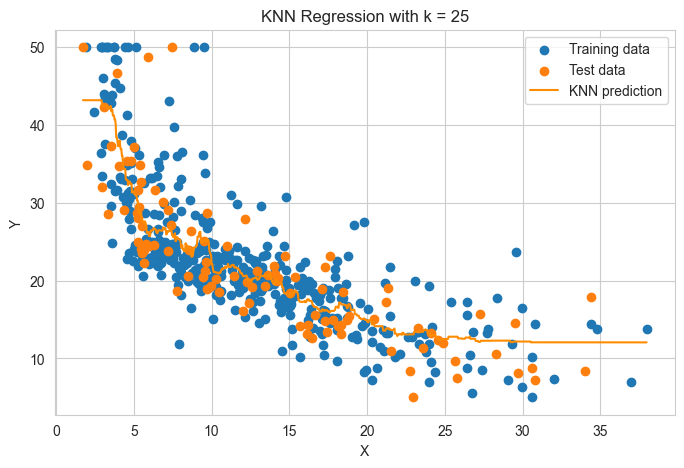

In [11]:
plt.figure(figsize = (8,5))
plt.scatter(X_train, y_train, label = 'Training data')
plt.scatter(X_test, y_test, label = 'Test data')

X_plot = np.linspace(np.min(X), np.max(X), 1000)
y_plot = np.array([knnr(x, k=25, X_train=X_train, y_train=y_train) for x in X_plot])
plt.plot(X_plot, y_plot, color='darkorange', label='KNN prediction')
plt.title(f"KNN Regression with k = {k}")
plt.xlabel("X"); plt.ylabel("Y")
plt.legend()
plt.show()

### Repeat the procedure $50$ times and report the avg MSE for various $k$, for Train and test data

In [12]:
Res = []
R = 50

for r in range(R):
    X = np.array(df['X'])
    y = np.array(df['Y'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # X_train = X[:80]; X_test = X[80:]; y_train = y[:80]; y_test = y[80:]
    
    errs = []
    #k_values = [1, 2, 5, 10, 20, 40, 80]
    for k in range(1,51):
        y_pred_train = np.array([knnr(x, k=k, X_train=X_train, y_train=y_train) for x in X_train])
        y_pred_test = np.array([knnr(x, k=k, X_train=X_train, y_train=y_train) for x in X_test])
        
        trn_errs = mean_squared_error(y_train, y_pred_train)
        tst_errs = mean_squared_error(y_test, y_pred_test)
    
        errs.append([trn_errs, tst_errs])
    
    Res.append(errs)

Res_df = pd.DataFrame(np.mean(Res, axis=0), columns=['Avg Train error', 'Avg Test error'])
Res_df.insert(loc=0, column='k', value=np.arange(1,51))
Res_df

,k,Avg Train error,Avg Test error
0,1,5.003366,62.469902
1,2,12.624672,47.566740
2,3,18.887030,38.668736
3,4,21.049952,36.828750
4,5,21.222481,34.112784
5,6,22.158968,29.637418
6,7,22.856907,28.974852
7,8,23.709753,28.474943
8,9,24.041460,27.815778
9,10,24.346430,27.450908


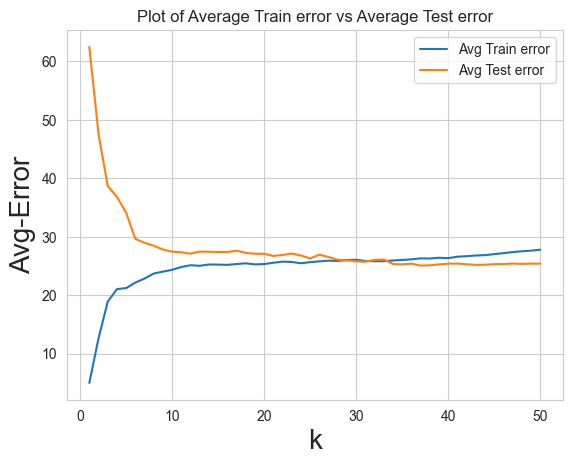

In [13]:
plt.plot(Res_df['k'], Res_df['Avg Train error'],label='Avg Train error')
plt.plot(Res_df['k'], Res_df['Avg Test error'],label='Avg Test error')
plt.xlabel('k', fontsize=20); plt.ylabel('Avg-Error', fontsize = 20)
plt.title('Plot of Average Train error vs Average Test error')
plt.legend()

### Using KNeighbors

In [14]:
X = np.array(df['X']).reshape(-1,1)
y = np.array(df['Y'])

In [15]:
X.shape, y.shape

((506, 1), (506,))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
k = 25
knn = KNeighborsRegressor(n_neighbors = k)
knn.fit(X_train, y_train)

y_pred_test = knn.predict(X_test)
y_pred_test.shape

(102,)

In [48]:
# 22-fold Cross-validation
k_folds = 22
fold_size = len(df) // k_folds
k_values = range(1, 51)  # Try different k neighbors
val_errors = {k: [] for k in k_values}
r_scores = {k: [] for k in k_values}
for i in range(k_folds):
    np.random.seed(42)
    shuffled_df = df.iloc[np.random.permutation(len(df))].reset_index(drop=True)
    start = i * fold_size
    end = (i + 1) * fold_size if i != k_folds - 1 else len(shuffled_df)

    Test_set = shuffled_df.iloc[start:end]
    Train_set = pd.concat([shuffled_df.iloc[:start], shuffled_df.iloc[end:]])
    X_train = Train_set['X'].values.reshape(-1,1)
    y_train = Train_set['Y'].values
    X_test = Test_set['X'].values.reshape(-1,1)
    y_test = Test_set['Y'].values

    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(X_train, y_train)
        y_pred_test = knn.predict(X_test)
        error =  mean_squared_error(y_test, y_pred_test)
        score =  r2_score(y_test, y_pred_test)
        val_errors[k].append(error)
        r_scores[k].append(score)

# Average validation error
avg_errors = {k: np.mean(val_errors[k]) for k in k_values}
avg_r_scores = {k: np.mean(r_scores[k]) for k in k_values}
# Find best k
best_k1 = min(avg_errors, key=avg_errors.get)
best_k2 = max(avg_r_scores, key=avg_r_scores.get)
print(f" Best k: {best_k1} with Avg Test MSE: {avg_errors[best_k1]:.4f}")
print(f" Best k: {best_k2} with Highest Avg R^2 Score: {avg_r_scores[best_k2]:.4f}")

 Best k: 37 with Avg Test MSE: 27.4016
 Best k: 37 with Highest Avg R^2 Score: 0.6333


Text(0.5, 1.0, 'Plot of Average Cross Val errors vs K values')

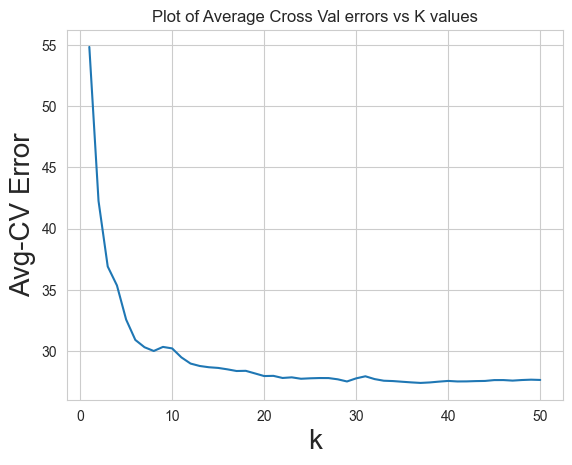

In [49]:
plt.plot(k_values, [avg_errors[k] for k in k_values])
plt.xlabel('k', fontsize=20); plt.ylabel('Avg-CV Error', fontsize = 20)
plt.title('Plot of Average Cross Val errors vs K values')

Text(0.5, 1.0, 'Plot of Average R^2 scores vs K values')

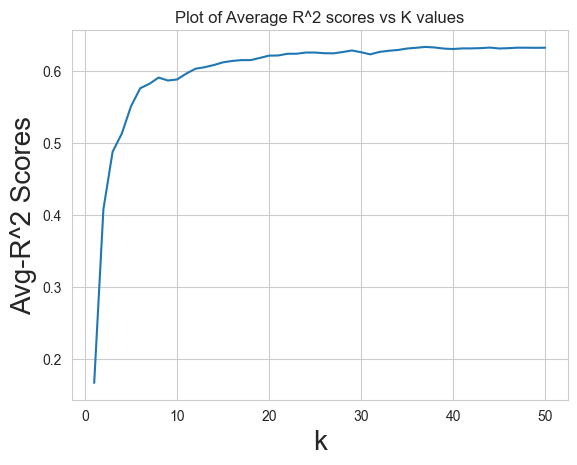

In [50]:
plt.plot(k_values, [avg_r_scores[k] for k in k_values])
plt.xlabel('k', fontsize=20); plt.ylabel('Avg-R^2 Scores', fontsize = 20)
plt.title('Plot of Average R^2 scores vs K values')

In [19]:
k = best_k1
knn = KNeighborsRegressor(n_neighbors = k)
knn.fit(X_train, y_train)

y_pred_test = knn.predict(X_test)
y_pred_test.shape

(102,)

In [20]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_test))
print("R^2 Score:", r2_score(y_test, y_pred_test))

Mean Squared Error: 25.07079118864492
R^2 Score: 0.7179313093570783


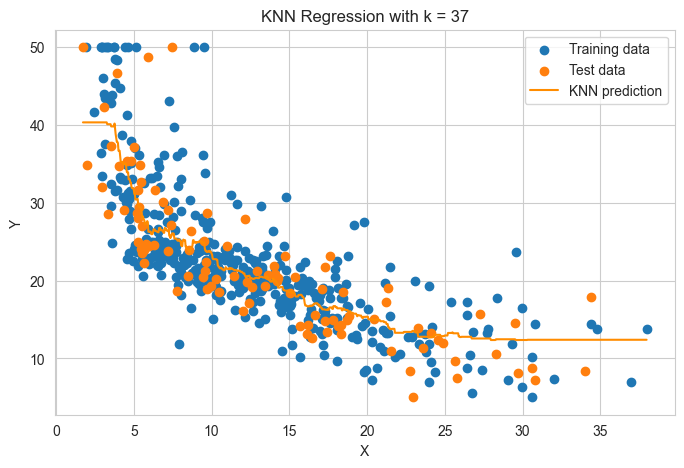

In [21]:
# Predict for plotting
plt.figure(figsize=(8, 5))
plt.scatter(X_train[:,0], y_train, label='Training data')
plt.scatter(X_test[:,0], y_test, label='Test data')

X_plot = np.linspace(np.min(X), np.max(X), 1000); y_plot = knn.predict(X_plot.reshape(-1, 1))
plt.plot(X_plot, y_plot, color='darkorange', label='KNN prediction')
plt.title(f"KNN Regression with k = {k}")
plt.xlabel("X"); plt.ylabel("Y")
plt.legend()
plt.show()

### Repeat the procedure $50$ times and report the avg MSE for various $k$, for Train and test data

In [22]:
Res = []
R = 50

for r in range(R):
    X = np.array(df['X']).reshape(-1,1)
    y = np.array(df['Y'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    errs = []
    #k_values = [1, 2, 5, 10, 20, 40, 80]
    for k in range(1,51):
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(X_train, y_train)

        y_pred_train = knn.predict(X_train); y_pred_test = knn.predict(X_test)
        trn_errs = mean_squared_error(y_train, y_pred_train)
        tst_errs = mean_squared_error(y_test, y_pred_test)
        
        errs.append([trn_errs, tst_errs])

    Res.append(errs)
    
Res_df = pd.DataFrame(np.mean(Res, axis=0), columns=['Avg Train error', 'Avg Test error'])
Res_df.insert(loc=0, column='k', value=np.arange(1,51))
Res_df

,k,Avg Train error,Avg Test error
0,1,5.252475,62.918431
1,2,12.986597,46.712426
2,3,18.511271,39.629641
3,4,20.995497,36.844884
4,5,21.236234,34.255733
5,6,22.104849,29.604932
6,7,22.540726,29.269390
7,8,23.626100,28.343725
8,9,24.185615,27.690234
9,10,24.436321,27.454191


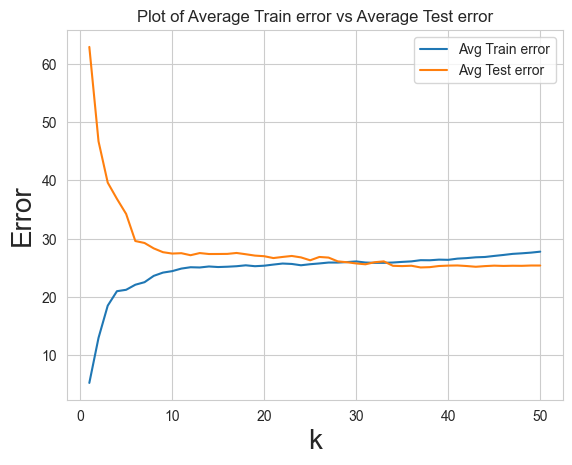

In [23]:
plt.plot(Res_df['k'], Res_df['Avg Train error'],label='Avg Train error')
plt.plot(Res_df['k'], Res_df['Avg Test error'],label='Avg Test error')
plt.xlabel('k', fontsize=20); plt.ylabel('Error', fontsize = 20)
plt.title('Plot of Average Train error vs Average Test error')
plt.legend()